<h1>HW6</h1>

# Question
### (Inverse Transform Sampling) Complete the following exercises 

### 1.1

Create a function to sample from a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$:

* Function name: sample_gaussian

* Input: $\mu$, $\sigma$, n

* Output: a n-element vector of random sample from Gaussian~N($\mu$, $\sigma$)

* You are `not allowed` to use the Distributions.jl package or any existing sampler
* You are `allowed` to use SpecialFunctions.jl for special functions and rand for random number generation


An [example](https://stephens999.github.io/fiveMinuteStats/inverse_transform_sampling.html) of inverse transform sampling

In [1]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots","Distributions"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [2]:
import SpecialFunctions
import Plots

In [3]:
using SpecialFunctions, Plots
function sample_gaussian(μ,σ,n)
    gaussRegular = zeros(n)
    gaussTransformed = zeros(n)
    for i in 1:n
        uniform = rand()
        gaussRegular[i] = sqrt(2) .* SpecialFunctions.erfinv(1 .- (2 .* uniform))
    end
    gaussTransformed = (gaussRegular .* σ) .+ μ 
end


sample_gaussian (generic function with 1 method)

### 1.2


1. Use the sampler above to draw 10000 samples from a Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2)
2. Plot the histogram of the 10000 samples 
3. Use the Distributions.jl package to obtain the pdf of the same Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2) using x = -8:0.001:6
4. Plot the pdf on top of the histogram from step 2

In [27]:
import Distributions
using Distributions

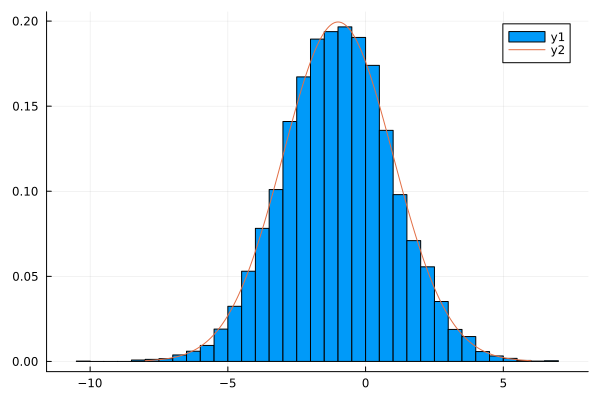

In [50]:
x = collect(-8:0.001:6)
μ = -1
σ = 2
n = 10000
samp = sample_gaussian(μ,σ,n)
Plots.histogram(x,samp,normalize = true)
d = Distributions.Normal(μ,σ)
pdf_ans = Distributions.pdf.(d,x)
Plots.plot!(x,pdf_ans,normalize = true)